## **Historical Structures**

Historical structures are vital cultural assets that preserve heritage and drive tourism. This project uses machine learning to monitor the condition of these sites, enabling early detection of maintenance needs and timely reporting to authorities. Additionally, a recommendation engine is implemented to understand tourist preferences and provide personalized travel suggestions, supporting both heritage preservation and tourism growth.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skn
import openpyxl
from sklearn.metrics.pairwise import cosine_similarity

# Use a valid matplotlib style
if 'seaborn-v0_8-darkgrid' in plt.style.available:
	plt.style.use('seaborn-v0_8-darkgrid')
elif 'seaborn-darkgrid' in plt.style.available:
	plt.style.use('seaborn-darkgrid')
else:
	plt.style.use('seaborn')

In [177]:
import openpyxl

tourism_rating = pd.read_csv('tourism_rating.csv')
user = pd.read_csv('user.csv')
tourist_id = pd.read_excel('tourism_with_id.xlsx')

In [178]:
print("Tourism Ratings: \n", tourism_rating.head())
print('\n')
print("User Data: ", user.head())
print('\n')
print("Tourist IDs: \n", tourist_id.head())

Tourism Ratings: 
    User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4


User Data:     User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20


Tourist IDs: 
    Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di 

In [179]:
print("Shape of tourism rating: \n", tourism_rating.shape)
print('\n')
print("Shape of user data:\n ", user.shape)
print('\n')
print("Shape of tourist IDs: \n", tourist_id.shape)

Shape of tourism rating: 
 (10000, 3)


Shape of user data:
  (300, 3)


Shape of tourist IDs: 
 (437, 13)


In [180]:
print("Tourism Rating Columns: \n", tourism_rating.columns)
print('\n')
print("User Data Columns: \n", user.columns)
print('\n')
print("Tourist ID Columns: \n", tourist_id.columns)

Tourism Rating Columns: 
 Index(['User_Id', 'Place_Id', 'Place_Ratings'], dtype='object')


User Data Columns: 
 Index(['User_Id', 'Location', 'Age'], dtype='object')


Tourist ID Columns: 
 Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')


In [181]:
print("Tourism Rating Statistics: \n", tourism_rating.describe())
print('\n')
print("User Data Statistics: \n", user.describe())
print('\n')
print("Tourist ID Statistics: \n", tourist_id.describe())

Tourism Rating Statistics: 
             User_Id      Place_Id  Place_Ratings
count  10000.000000  10000.000000   10000.000000
mean     151.292700    219.416400       3.066500
std       86.137374    126.228335       1.379952
min        1.000000      1.000000       1.000000
25%       77.000000    108.750000       2.000000
50%      151.000000    220.000000       3.000000
75%      226.000000    329.000000       4.000000
max      300.000000    437.000000       5.000000


User Data Statistics: 
           User_Id         Age
count  300.000000  300.000000
mean   150.500000   28.700000
std     86.746758    6.393716
min      1.000000   18.000000
25%     75.750000   24.000000
50%    150.500000   29.000000
75%    225.250000   34.000000
max    300.000000   40.000000


Tourist ID Statistics: 
          Place_Id          Price      Rating  Time_Minutes         Lat  \
count  437.000000     437.000000  437.000000    205.000000  437.000000   
mean   219.000000   24652.173913    4.442792     82.609756 

In [182]:
print("Tourism Rating Missing Values: \n", tourism_rating.isnull().sum())
print('\n')

print("Tourists with IDs Missing values: \n", tourist_id.isnull().sum())
print('\n')

print("User Data Missing Values: \n", user.isnull().sum())

Tourism Rating Missing Values: 
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


Tourists with IDs Missing values: 
 Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


User Data Missing Values: 
 User_Id     0
Location    0
Age         0
dtype: int64


In [183]:
tourist_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [184]:
tourist_id.drop(columns=['Unnamed: 11', 'Unnamed: 12'], inplace=True)

In [185]:
tourist_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


#### **People from the same city, touring the same type of tourism (category), with similar ratings tend to spend the same amound of time touring.**

**City-based similarity:**
- Places in the same city often have similar travel times due to location, accessibility, and typical tourist patterns.

**Category-based similarity:**
- Places in the same category (e.g., museums, parks, historical sites) tend to have similar visit durations — for example, museums may take 90–120 minutes, while viewpoints may take 20–40 minutes.

**Rating-based similarity:**
- Tourists who give similar ratings may have similar engagement levels — someone who rates highly might spend more time exploring, while lower ratings might correlate with shorter visits.

In [186]:
tourist_id['Time_Minutes'] = tourist_id['Time_Minutes'].fillna(
    tourist_id.groupby(['City', 'Category'])['Time_Minutes'].transform('mean')
)

In [187]:
print("Still some missing values: \n", tourist_id.isna().sum())

Still some missing values: 
 Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Time_Minutes    26
Coordinate       0
Lat              0
Long             0
dtype: int64


In [188]:
tourist_id['Time_Minutes'] = tourist_id['Time_Minutes'].fillna(
    tourist_id.groupby(['Category'])['Time_Minutes'].transform('mean')
)

print("Still some missing values: \n", tourist_id.isna().sum())

Still some missing values: 
 Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Time_Minutes    17
Coordinate       0
Lat              0
Long             0
dtype: int64


In [189]:
tourist_id['Time_Minutes'] = tourist_id['Time_Minutes'].fillna(tourist_id['Time_Minutes'].median())
print("Still some missing values: \n", tourist_id.isna().sum())

Still some missing values: 
 Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Coordinate      0
Lat             0
Long            0
dtype: int64


In [190]:
print("Check for duplicates for Tourism Rating: \n", tourism_rating.duplicated().sum())
print('\n')
print("Check for duplicates for Tourist ID: \n", tourist_id.duplicated().sum())
print('\n')
print("Check for duplicates for User: \n", user.duplicated().sum())

Check for duplicates for Tourism Rating: 
 79


Check for duplicates for Tourist ID: 
 0


Check for duplicates for User: 
 0


In [191]:
tourism_rating.drop_duplicates(inplace=True)
print("Tourism Rating after removing duplicates: \n", tourism_rating.duplicated().sum(), "Duplicates")

Tourism Rating after removing duplicates: 
 0 Duplicates


In [192]:
tourist_id['Category'] = tourist_id['Category'].astype('category')

In [193]:
print("Standardize and Clean Column Names")
tourism_rating.columns = tourism_rating.columns.str.strip().str.lower().str.replace(' ', '_')
tourist_id.columns = tourist_id.columns.str.strip().str.lower().str.replace(' ', '_')
user.columns = user.columns.str.strip().str.lower().str.replace(' ', '_')

Standardize and Clean Column Names


In [194]:
user.head(20)

,user_id,location,age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
5,6,"Jakarta Utara, DKI Jakarta",18
6,7,"Jakarta Selatan, DKI Jakarta",39
7,8,"Bandung, Jawa Barat",40
8,9,"Surabaya, Jawa Timur",38
9,10,"Bekasi, Jawa Barat",39


### **Analyzing Age Distribution of Users**

**Purpose:** Understand the **demographics** of toursts - are they mostly young adults, middle-aged, or seniors? This can guide marketing strategies.

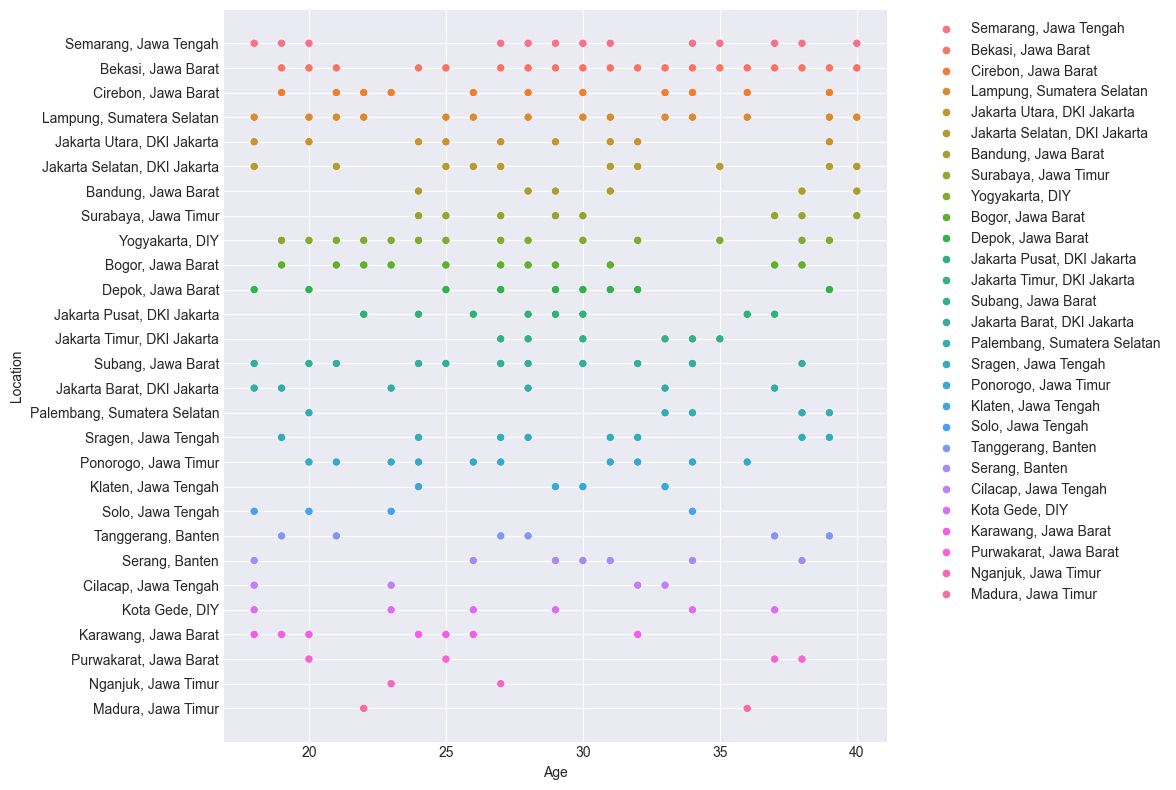

In [195]:
# user data has id, age, and location as columns, we will plot a scatter plot and the color by location.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=user, x='age', y='location', hue='location')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Age')
plt.ylabel('Location')
plt.tight_layout()

- Merge User Data with Tourism Rating dataset on Uder ID.

In [196]:
merged_tourism_data = pd.merge(tourism_rating, user, on='user_id', how='inner')

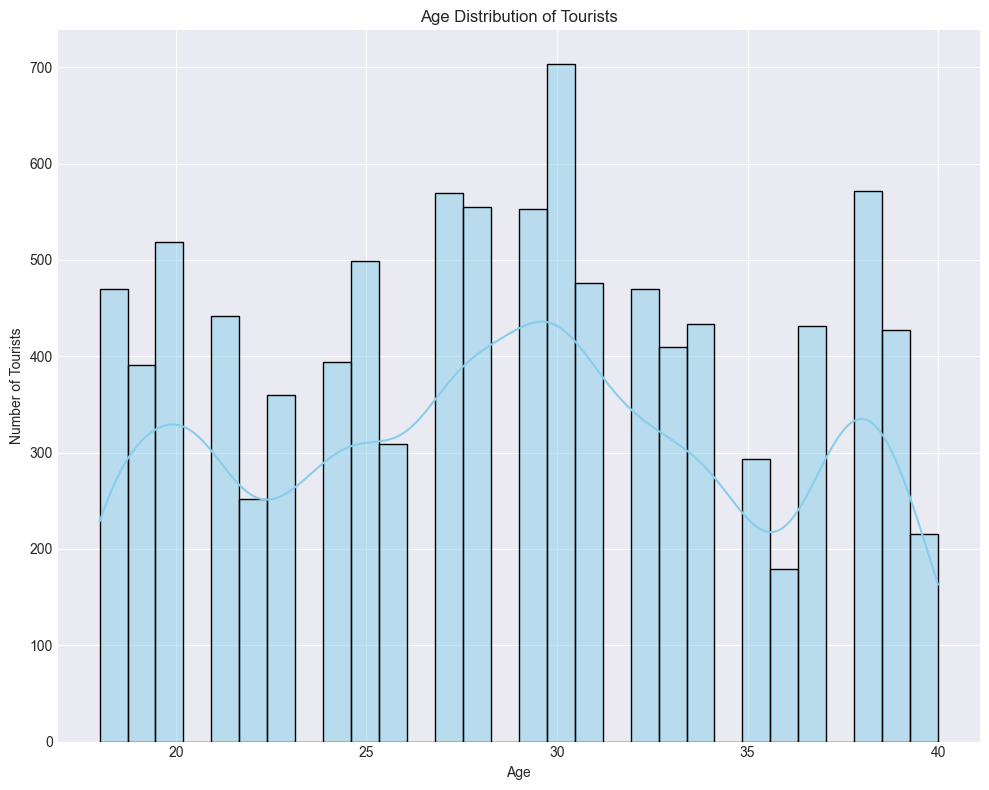

In [197]:
plt.figure(figsize=(10, 8))
sns.histplot(merged_tourism_data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Tourists')
plt.xlabel('Age')
plt.ylabel('Number of Tourists')
plt.tight_layout()

### **Age Distribution of Tourists**

- From the distribution, people of around age 30 are the most people that tour.
- The skewness of the graph also shows that young adults are the most participants of touring.

In [198]:
merged_tourism_data.head()


,user_id,place_id,place_ratings,location,age
0,1,179,3,"Semarang, Jawa Tengah",20
1,1,344,2,"Semarang, Jawa Tengah",20
2,1,5,5,"Semarang, Jawa Tengah",20
3,1,373,3,"Semarang, Jawa Tengah",20
4,1,101,4,"Semarang, Jawa Tengah",20


### **Identify Tourists' Original Locations**

**Purpose:** Find out **where most tourists are coming from -- useful for targeted marketing

C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\4139298070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='location', data=location_data, palette='viridis')


Text(0, 0.5, 'Location')

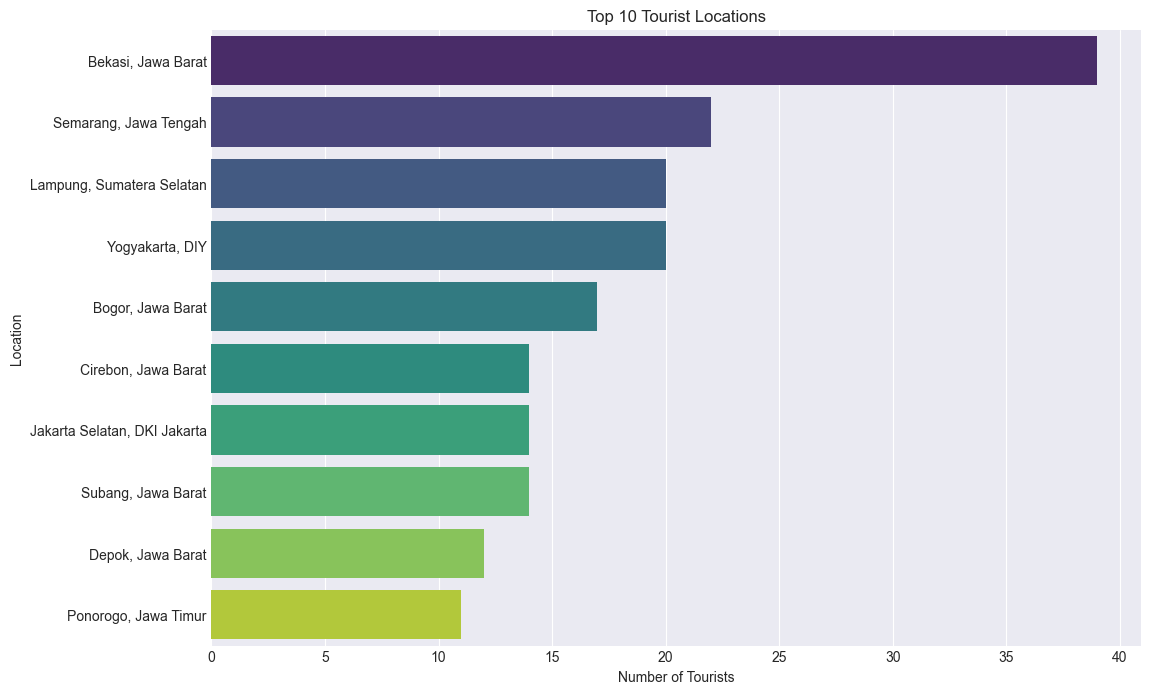

In [199]:
location_data = user['location'].value_counts().reset_index().head(10)
location_data.columns = ['location', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='location', data=location_data, palette='viridis')
plt.title('Top 10 Tourist Locations')
plt.xlabel('Number of Tourists')
plt.ylabel('Location')

- Bekasi and Jawa Barat are the most sought after places for tourists. 

### **Let's check if certain locations are filled with ages of specific groups**

**Purpose:** To see if certain cities send younger or older tourists.

C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\835210634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user, y='location', x='age', palette='viridis')


Text(0, 0.5, 'Location')

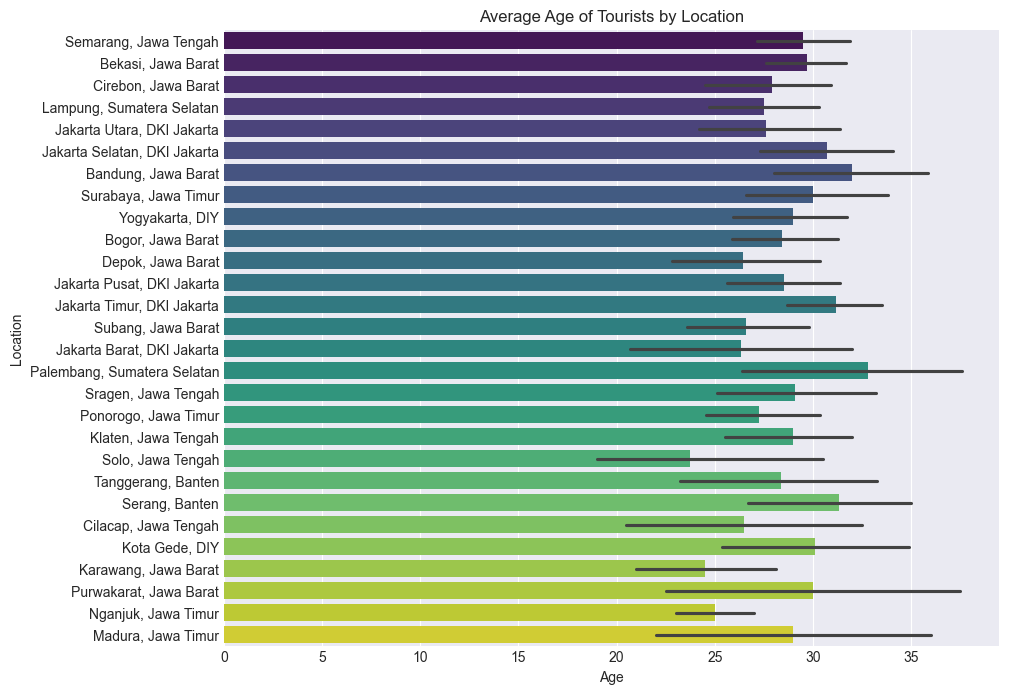

In [200]:
plt.figure(figsize=(10, 8))
sns.barplot(data=user, y='location', x='age', palette='viridis')
plt.title('Average Age of Tourists by Location')
plt.xlabel('Age')
plt.ylabel('Location')

In [201]:
merged_tourism_data.shape

(9921, 5)

In [202]:
merged_dataset = pd.merge(tourist_id, merged_tourism_data, on='place_id', how='inner')

### **Merge the entire datasets to draw some conclusive insights.**

**Purpose:** Cross-Analysis of Age by place, category and city.

In [203]:
full_dataset = pd.merge(tourist_id, merged_tourism_data, on='place_id', how='inner')

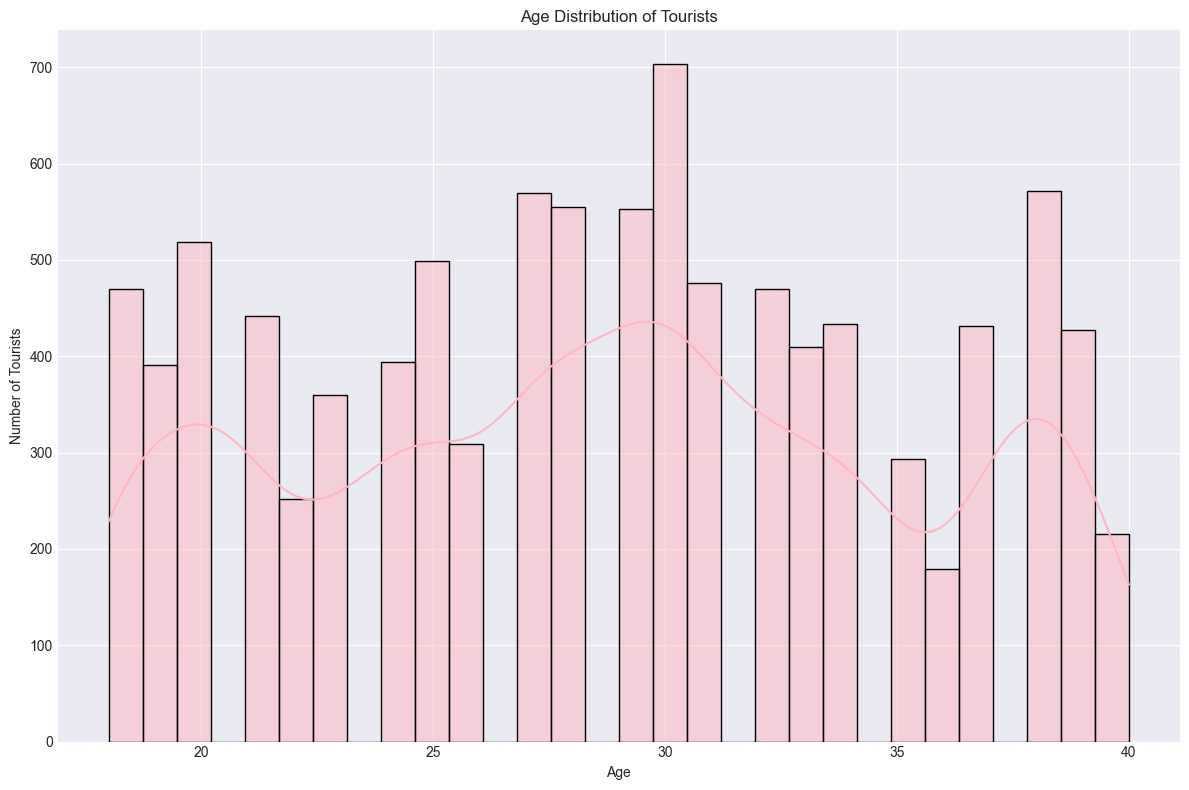

In [204]:
plt.figure(figsize=(12, 8))
sns.histplot(full_dataset['age'], bins=30, kde=True, color='lightpink')
plt.title('Age Distribution of Tourists')
plt.xlabel('Age')
plt.ylabel('Number of Tourists')
plt.tight_layout()

C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\221241128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_dataset, x='age', y='category', palette='viridis')


Text(0, 0.5, 'Category')

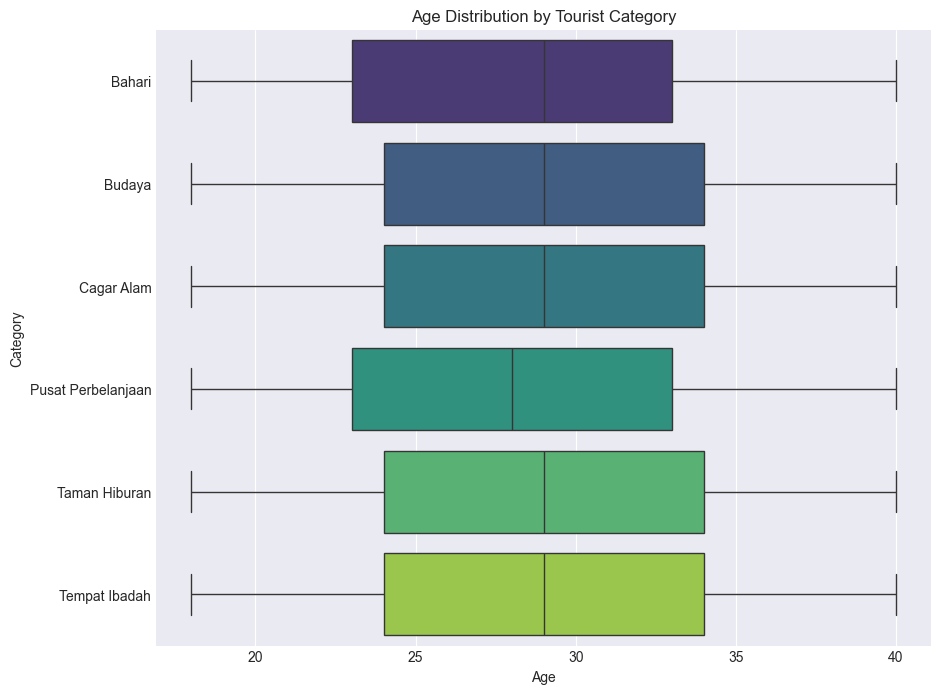

In [205]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=full_dataset, x='age', y='category', palette='viridis')
plt.title('Age Distribution by Tourist Category')
plt.xlabel('Age')
plt.ylabel('Category')

- Pusat Perbelanjaan and Bahari seem to be the categories (places) with the youngets tourers.

C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\4153945423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_dataset, x='age', y='city', palette='viridis')


Text(0, 0.5, 'City')

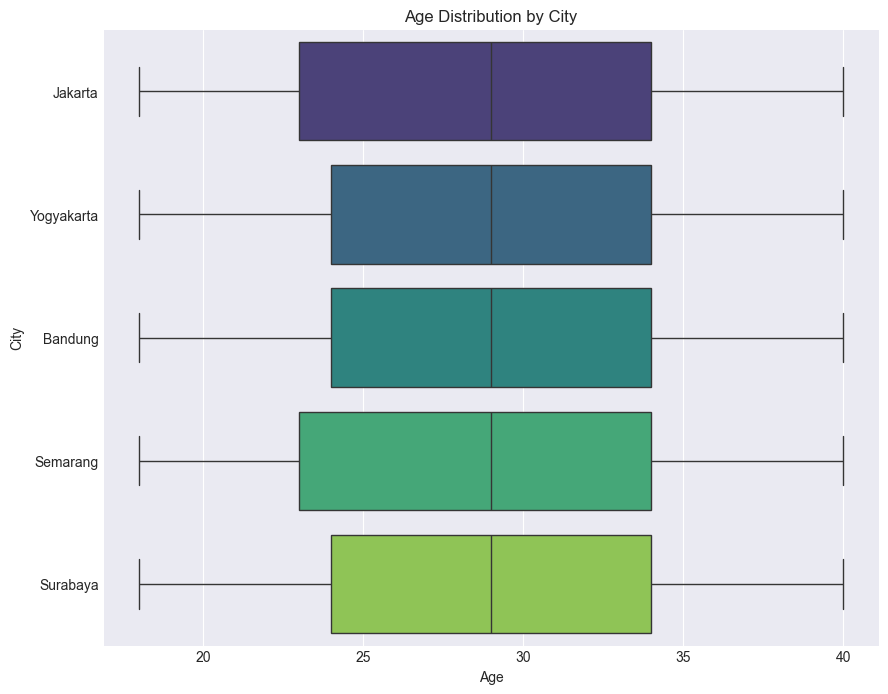

In [206]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=full_dataset, x='age', y='city', palette='viridis')
plt.title('Age Distribution by City')
plt.xlabel('Age')
plt.ylabel('City')

In [207]:
categories = tourist_id['category'].unique()
print("Tourist Spot Categories:")
for category in categories:
    print("- ", category)

Tourist Spot Categories:
-  Budaya
-  Taman Hiburan
-  Cagar Alam
-  Bahari
-  Pusat Perbelanjaan
-  Tempat Ibadah


In [208]:
city_category = tourist_id.groupby(['city', 'category']).agg(lambda x: x.value_counts().index[0])
print("City and Category Distribution:")
print(city_category)

City and Category Distribution:
                               place_id  \
city       category                       
Bandung    Bahari                   NaN   
           Budaya                 212.0   
           Cagar Alam             211.0   
           Pusat Perbelanjaan     284.0   
           Taman Hiburan          214.0   
           Tempat Ibadah          223.0   
Jakarta    Bahari                   9.0   
           Budaya                   1.0   
           Cagar Alam               7.0   
           Pusat Perbelanjaan      15.0   
           Taman Hiburan            3.0   
           Tempat Ibadah           22.0   
Semarang   Bahari                 343.0   
           Budaya                 335.0   
           Cagar Alam             341.0   
           Pusat Perbelanjaan       NaN   
           Taman Hiburan          336.0   
           Tempat Ibadah          352.0   
Surabaya   Bahari                 424.0   
           Budaya                 396.0   
           Cagar Alam 

C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\1778933691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_category = tourist_id.groupby(['city', 'category']).agg(lambda x: x.value_counts().index[0])


### **Transalte the categories to English**

In [209]:
category_mapping = {
"Budaya": {
    "English": "Culture",
    "Tourism_Type": "Cultural Tourism"
},
"Taman Hiburan": {
    "English": "Amusement Park",
    "Tourism_Type": "Entertainment Tourism"
},
"Cagar Alam": {
    "English": "Nature Reserve",
    "Tourism_Type": "Nature / Ecotourism"
},
"Bahari": {
    "English": "Marine",
    "Tourism_Type": "Marine / Beach Tourism"
},
"Pusat Perbelanjaan": {
    "English": "Shopping Center",
    "Tourism_Type": "Shopping Tourism"
},
"Tempat Ibadah": {
    "English": "Place of Worship",
    "Tourism_Type": "Religious Tourism"
}
}

In [210]:
full_dataset.columns

Index(['place_id', 'place_name', 'description', 'category', 'city', 'price',
       'rating', 'time_minutes', 'coordinate', 'lat', 'long', 'user_id',
       'place_ratings', 'location', 'age'],
      dtype='object')

In [211]:
full_dataset['category_english'] = full_dataset['category'].map(lambda x: category_mapping[x]['English'])
full_dataset['tourism_type'] = full_dataset['category'].map(lambda x: category_mapping[x]['Tourism_Type'])

In [212]:
full_dataset.head()

,place_id,place_name,description,category,city,price,rating,time_minutes,coordinate,lat,long,user_id,place_ratings,location,age,category_english,tourism_type
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4,"Solo, Jawa Tengah",20,Culture,Cultural Tourism
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,38,2,"Serang, Banten",26,Culture,Cultural Tourism
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,64,2,"Bandung, Jawa Barat",38,Culture,Cultural Tourism
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,74,2,"Semarang, Jawa Tengah",30,Culture,Cultural Tourism
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,86,4,"Depok, Jawa Barat",32,Culture,Cultural Tourism


In [213]:
full_dataset['category_english'].unique()

['Culture', 'Amusement Park', 'Nature Reserve', 'Marine', 'Shopping Center', 'Place of Worship']
Categories (6, object): ['Marine', 'Culture', 'Nature Reserve', 'Shopping Center', 'Amusement Park', 'Place of Worship']

In [214]:
full_dataset.columns

Index(['place_id', 'place_name', 'description', 'category', 'city', 'price',
       'rating', 'time_minutes', 'coordinate', 'lat', 'long', 'user_id',
       'place_ratings', 'location', 'age', 'category_english', 'tourism_type'],
      dtype='object')

In [215]:
nature_keywords = ['Nature', 'Wildlife', 'Scenic', 'Outdoor', 'Adventure', ' Park', 'Beach', 'Lake']
nature_data = full_dataset[full_dataset['category_english'].str.contains('|'.join(nature_keywords), case=False, na=False)] # Filter for nature-related categories

In [216]:
nature_city_counts = nature_data['city'].value_counts()

print("Cities ranked by number of nature attractions:")
print(nature_city_counts.head(10))

Cities ranked by number of nature attractions:
city
Bandung       2091
Yogyakarta    1326
Semarang       808
Jakarta        689
Surabaya       507
Name: count, dtype: int64


C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\635902203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nature_city_counts.values, y=nature_city_counts.index, palette='viridis')


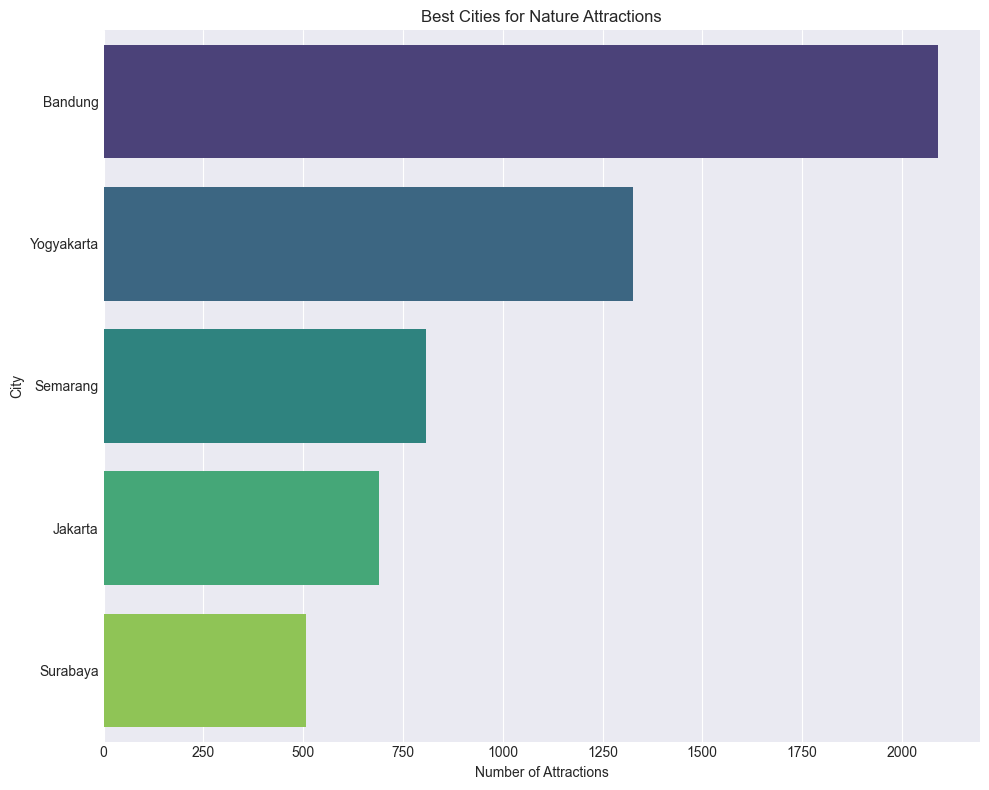

In [217]:
plt.figure(figsize=(10, 8))
sns.barplot(x=nature_city_counts.values, y=nature_city_counts.index, palette='viridis')
plt.title("Best Cities for Nature Attractions")
plt.xlabel("Number of Attractions")
plt.ylabel("City")
plt.tight_layout()

- Bandung is the city with the highest visits, meaning it could be the most nature attractions.

In [218]:
city_type_counts = full_dataset.groupby(['city', 'tourism_type']).size().reset_index(name='count')

print(city_type_counts.head())

      city            tourism_type  count
0  Bandung  Marine / Beach Tourism      0
1  Bandung        Cultural Tourism    529
2  Bandung     Nature / Ecotourism   1230
3  Bandung        Shopping Tourism     21
4  Bandung   Entertainment Tourism    861


C:\Users\KgomotsoMkhawane\AppData\Local\Temp\ipykernel_35088\429916922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_type_counts = full_dataset.groupby(['city', 'tourism_type']).size().reset_index(name='count')


In [219]:
most_common_tour_per_city = city_type_counts.iloc[city_type_counts.groupby('city')['count'].idxmax()]

print(most_common_tour_per_city.head())

          city           tourism_type  count
2      Bandung    Nature / Ecotourism   1230
7      Jakarta       Cultural Tourism    719
14    Semarang    Nature / Ecotourism    456
19    Surabaya       Cultural Tourism    402
28  Yogyakarta  Entertainment Tourism    801


In [220]:
most_common_tour_per_city = most_common_tour_per_city.rename(columns={'tourism_type': 'most_common_tourism_type'})

print("Most Common Tourism Type per City:")
print(most_common_tour_per_city.head())

Most Common Tourism Type per City:
          city most_common_tourism_type  count
2      Bandung      Nature / Ecotourism   1230
7      Jakarta         Cultural Tourism    719
14    Semarang      Nature / Ecotourism    456
19    Surabaya         Cultural Tourism    402
28  Yogyakarta    Entertainment Tourism    801


(np.float64(-1.0999994924602363),
 np.float64(1.0999995013826822),
 np.float64(-1.0999928247608692),
 np.float64(1.0999928204293543))

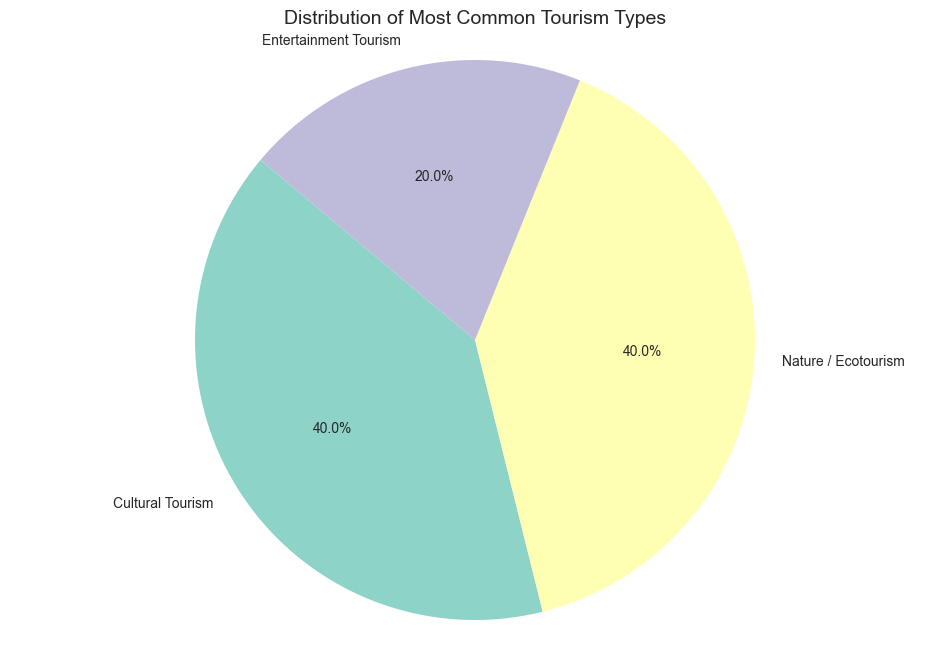

In [221]:
famous_tour_type_count = most_common_tour_per_city['most_common_tourism_type'].value_counts()

famous_tour_type_count = famous_tour_type_count[famous_tour_type_count > 0]

plt.figure(figsize=(12, 8))
plt.pie(
    famous_tour_type_count,
    labels=famous_tour_type_count.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Distribution of Most Common Tourism Types', fontsize=14)
plt.axis('equal')

In [222]:
famous_tour_type_count.head()

most_common_tourism_type
Cultural Tourism         2
Nature / Ecotourism      2
Entertainment Tourism    1
Name: count, dtype: int64

## **Building a recommendation engine**

We'll use item-based collaborative filtering

- Build a user-item rating matrix.
- Compute similarity between places based on how users rated them.
- Having current place name, find other places with the highest similarity.

In [230]:
ratings_matrix = full_dataset.pivot_table(
    index='user_id',
    columns='place_name',
    values='place_ratings'
)

ratings_matrix = ratings_matrix.fillna(0)

item_similarity = cosine_similarity(ratings_matrix.T)
item_similarity = pd.DataFrame(
    item_similarity,
    index=ratings_matrix.columns,
    columns=ratings_matrix.columns
)

def recommend_places(place_name, num_recommendations=5):
    """
    Recommend similar places based on item similarity.
    Args:
        place_name (str): The name of the place to find recommendations for.
        num_recommendations (int): The number of recommendations to return.
    """
    if place_name not in item_similarity.columns:
        return f"Place '{place_name}' not found in the dataset."

    similar_places = item_similarity[place_name].sort_values(ascending=False).iloc[1:num_recommendations+1]

    recommendations = pd.DataFrame(similar_places).reset_index()
    recommendations.columns = ['place_name', 'similarity_score']

    place_info_cols = ['place_name', 'tourism_type', 'rating', 'city', 'category_english']
    recommendations = recommendations.merge(
        full_dataset[place_info_cols].drop_duplicates(),
        on='place_name',
        how='left'
    )
    return recommendations

# Example usage
recommendations = recommend_places('Monumen Nasional', num_recommendations=5)
print(f"Recommendations for 'Monumen Nasional':\n{recommendations}")

Recommendations for 'Monumen Nasional':
                 place_name  similarity_score           tourism_type  rating  \
0     Wisata Mangrove Tapak          0.268835    Nature / Ecotourism     4.3   
1         Danau Rawa Pening          0.262729    Nature / Ecotourism     4.4   
2  Museum Sonobudoyo Unit I          0.260171       Cultural Tourism     4.6   
3             Dunia Fantasi          0.252406  Entertainment Tourism     4.6   
4           Situ Patenggang          0.241168    Nature / Ecotourism     4.5   

         city category_english  
0    Semarang   Nature Reserve  
1    Semarang   Nature Reserve  
2  Yogyakarta          Culture  
3     Jakarta   Amusement Park  
4     Bandung   Nature Reserve  


In [231]:
full_dataset['place_name'].unique()

array(['Monumen Nasional', 'Kota Tua', 'Dunia Fantasi',
       'Taman Mini Indonesia Indah (TMII)', 'Atlantis Water Adventure',
       'Taman Impian Jaya Ancol', 'Kebun Binatang Ragunan',
       'Ocean Ecopark', 'Pelabuhan Marina', 'Pulau Tidung',
       'Pulau Bidadari', 'Pulau Pari', 'Pulau Pramuka', 'Pulau Pelangi',
       'Pasar Seni', 'Jembatan Kota Intan', 'Museum Fatahillah',
       'Museum Bank Indonesia', 'Kidzania', 'Museum Taman Prasasti',
       'Museum Wayang', 'Masjid Istiqlal', 'Gereja Katedral',
       'Museum Nasional', 'Pasar Tanah Abang', 'Pecinan Glodok',
       'Sea World', 'Wisata Agro Edukatif Istana Susu Cibugary',
       'Wisata Kuliner Pecenongan', 'Taman Menteng',
       'Wisata Alam Mangrove Angke', 'Setu Babakan', 'Taman Suropati',
       'Pasar Taman Puring', 'Grand Indonesia Mall',
       'Skyrink - Mall Taman Anggrek', 'Bumi Perkemahan Cibubur',
       'Istana Negara Republik Indonesia',
       'Museum Macan (Modern and Contemporary Art in Nusantara)',
 

In [232]:
recommendations = recommend_places('Kota Tua', num_recommendations=5)
print(f"Recommendations for 'Kota Tua':\n{recommendations}")

Recommendations for 'Kota Tua':
                 place_name  similarity_score           tourism_type  rating  \
0    Museum Kereta Ambarawa          0.284490       Cultural Tourism     4.5   
1             Tebing Breksi          0.270309       Cultural Tourism     4.4   
2         Bangsal Pagelaran          0.229365       Cultural Tourism     4.6   
3  Kampung Wisata Kadipaten          0.227716       Cultural Tourism     4.4   
4      Orchid Forest Cikole          0.212934  Entertainment Tourism     4.6   

         city category_english  
0    Semarang          Culture  
1  Yogyakarta          Culture  
2  Yogyakarta          Culture  
3  Yogyakarta          Culture  
4     Bandung   Amusement Park  


## **📒 Notes: Machine Learning Techniques Used in the Recommendation Engine**


#### **1. Collaborative Filtering**

Definition:
**Collaborative Filtering (CF)** is a recommendation technique that predicts a user’s interests by collecting preferences (ratings, likes, visits) from many users.
It assumes that if two users liked similar things in the past, they will like similar things in the future.

Two main types:

- User-Based CF: Finds users similar to you and recommends what they liked.
- Item-Based CF: Finds items (places) similar to the one you like and recommends them.

Why we used it:

- We have user ratings for places (user_id, place_name, place_ratings).
- We wanted to recommend places similar to a given place — so Item-Based CF was the best choice.
- It works well when we don’t have much info about the place’s content (like description), but we have user behavior data.


2. User–Item Ratings Matrix
Definition:
A table where:

- Rows = Users
- Columns = Items (places)
- Values = Ratings given by users to items.

Why we used it:

- This structure makes it easy to compare places or users mathematically.
- It’s the foundation for calculating similarity between items.


#### **3. Cosine Similarity**

Definition:
A measure of similarity between two vectors (lists of numbers) by looking at the angle between them, not their length.
It ranges from:

- 1 → Exactly the same direction (very similar)
- 0 → Completely different
Formula: [ \text{Cosine Similarity} = \frac{A \cdot B}{||A|| \times ||B||} ] Where:

- (A) and (B) are rating vectors for two places.

Why we used it:

- Ratings are like vectors for each place (e.g., [5, 0, 4, 3, ...]).
- Cosine similarity works well for sparse data (many missing ratings).
- It ignores rating scale differences — focuses on pattern of ratings.


#### **4. Item-Based Collaborative Filtering**

Definition:
A CF approach where we:

- Compare items (places) based on how users rated them.
- Recommend items most similar to the one the user is currently interested in.

Why we used it:

- Tourists often want similar places to the one they liked.

Example: If many people who liked “Borobudur Temple” also liked “Prambanan Temple”, we recommend it.

More stable than user-based CF when the number of users is large.


#### **5. Similarity Matrix**

Definition:
A table showing similarity scores between every pair of items.

Why we used it:

- Once computed, we can instantly find the top N similar places to any given place.
- Makes recommendations fast after the initial calculation.


#### **6. Ranking & Filtering**

Definition:
Sorting items by similarity score and picking the top N results.

Why we used it:

- We only want to show the most relevant recommendations.
- Filtering out the current place itself avoids recommending the same thing.

**How They Work Together in Our Engine**

1. **Build Ratings Matrix** → Organize user ratings into a table.
2. **Calculate Cosine Similarity** → Compare places based on ratings patterns.
3. **Create Similarity Matrix** → Store similarity scores for all place pairs.
4. **Recommendation Function** → Given a place, sort by similarity and return top matches.
5. **Enhance Output** → Add city, tourism type, and rating info for user-friendly results.

✅ Why This Approach Works for Tourism:

- Uses real tourist behavior (ratings) instead of just text descriptions.
- Can recommend hidden gems that share a visitor pattern with popular spots.
- Doesn’t require knowing a tourist’s personal history — works from a single place name.